In [1]:
import torch
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
words = open('../data/names.txt', 'r').read().splitlines()

In [3]:
words[:3]

['emma', 'olivia', 'ava']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<E>']
    for bigram in zip(chs, chs[1:]):
        b[bigram] = b.get(bigram, 0) + 1

# b

In [8]:
sorted(b.items(), key = lambda x : -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
N = torch.zeros((28,28), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi['<s>'] = 26
stoi['<E>'] = 27

In [22]:
stoi.items()

dict_items([('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7), ('i', 8), ('j', 9), ('k', 10), ('l', 11), ('m', 12), ('n', 13), ('o', 14), ('p', 15), ('q', 16), ('r', 17), ('s', 18), ('t', 19), ('u', 20), ('v', 21), ('w', 22), ('x', 23), ('y', 24), ('z', 25), ('<s>', 26), ('<E>', 27)])

In [11]:
for w in words:
    chs = ['<s>'] + list(w) + ['<E>']
    for bigram in zip(chs, chs[1:]):
        idx1 = stoi[bigram[0]]
        idx2 = stoi[bigram[1]]
        N[idx1, idx2] += 1
        

In [24]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<s>',
 27: '<E>'}

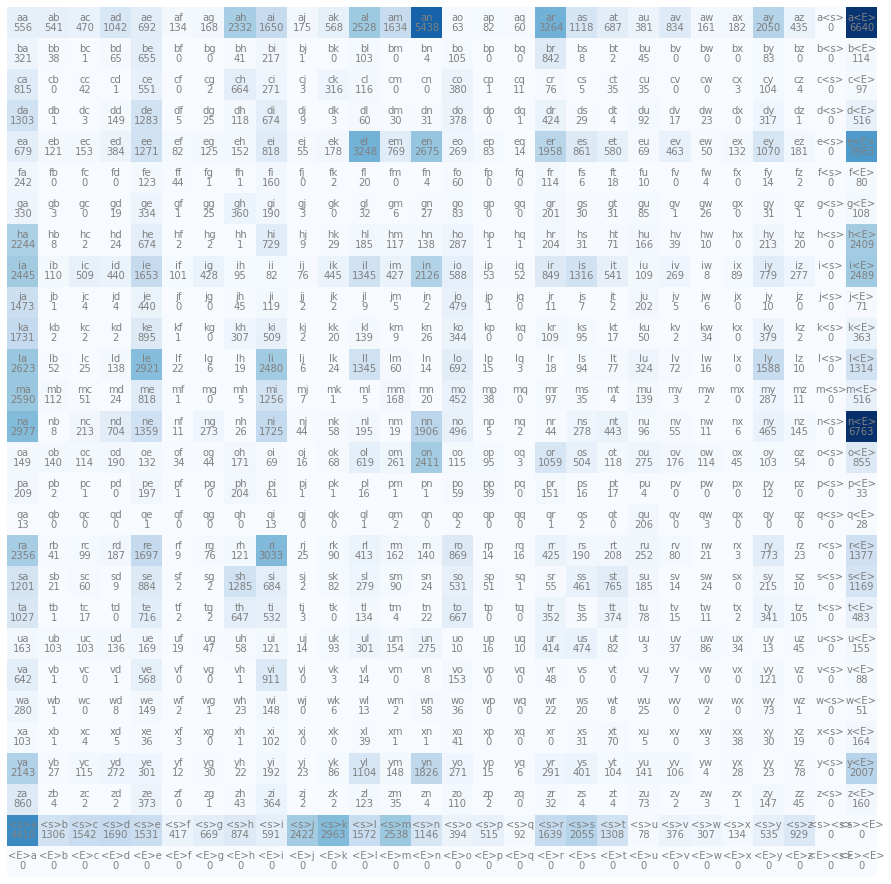

In [13]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');